<a href="https://colab.research.google.com/github/pranilthorat/almabetter-capstone-project-4-Netflix-Movies-and-TV-Shows-Clustering/blob/main/capstone_project_(4)_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#nltk import
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.drop(['director'],axis=1,inplace=True)
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [6]:
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [7]:
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [8]:
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [9]:
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [10]:
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [11]:
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [12]:
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [13]:
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

# 4. Clustering similar content by matching text-based features

In [14]:
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
#importing the libraries for cluster
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Converting Genre of column to list 
srk = df_clean_frame['Genre'].tolist()
srk

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
 'Dramas, International Movies',
 'Horror Movies, International Movies',
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows, TV Dramas, TV Mysteries',
 'Horror Movies, International Movies',
 'Dramas',
 'Horror Movies, International Movies',
 'Horror Movies, International Movies, Thrillers',
 'Dramas, Thrillers',
 'Documentaries, International Movies, Sports Movies',
 'Independent Movies, Sci-Fi & Fantasy, Thrillers',
 'Dramas, International Movies, Thrillers',
 'Comedies, Dramas, Independent Movies',
 'Sports Movies',
 'Dramas, Independent Movies, International Movies',
 'Action & Adventure, Dramas, International Movies',
 'Dramas, International Movies',
 'Dramas, International Movies',
 'Anime Series, International TV Shows',
 'Horror Movies, International Movies, Thrillers',
 'Documentaries, International Movies',
 'TV Comedies',
 'Dramas, International Movies, Romantic Movies',


In [17]:
#Changing all the text into lower case
srk = [low.lower() for low in srk]

In [18]:
#Handling all the urls if any
srk = [re.sub("\w+://\S+","", urls) for urls in srk]

In [19]:
#handling all the handles('@') if any
srk =[re.sub("@\w+","", handles) for handles in srk]

In [20]:
#Tokenizing the text
srk= [word_tokenize(word) for word in srk]

In [21]:
#Removing stopwords, appostrophes and punctuation from the text
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

#Adding some specific punctuation from the  data :
stop_punct.extend(['...','``',"''",".."])
stop_context = ['rt', 'amp',"'s"]

#Final stop word list including all of these:
stop_final = stop_nltk + stop_punct + stop_context

In [22]:
#A function to remove the stop words
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

#Applying the function on the data:
X_clean = [del_stop(clean) for clean in srk]

In [23]:
#Making  a list where all the words of the cleaned data is present
term_list = []
for i in X_clean:
    term_list.extend(i)

#Using counter to get top terms:
res = Counter(term_list)
res.most_common(10)

[('movies', 5844),
 ('tv', 4672),
 ('international', 3855),
 ('dramas', 3403),
 ('shows', 2367),
 ('comedies', 2182),
 ('action', 1136),
 ('adventure', 1136),
 ('romantic', 897),
 ('independent', 894)]

In [24]:
#Joining all the words to form a string
X_clean = [" ".join(label) for label in X_clean]

# tfidf new****

In [25]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
tfid_vectorizer= TfidfVectorizer()

In [27]:
# extract the tfid representation matrix of the text data
dada = tfid_vectorizer.fit_transform(X_clean)
# collect the tfid matrix in numpy array
X_tfidf = tfid_vectorizer.fit_transform(X_clean).toarray()

In [28]:
X_tfidf.shape

(8262, 45)

In [29]:
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.66700255,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [31]:
sse=[]
for i in range(1,25):
    model = KMeans(n_clusters=i)
    model.fit(X_tfidf)
    error = model.inertia_
    sse.append(error)
    print('cluster: %d \t SSE: %0.2f'%(i,error))

cluster: 1 	 SSE: 6721.61
cluster: 2 	 SSE: 5700.92
cluster: 3 	 SSE: 5156.44
cluster: 4 	 SSE: 4735.26
cluster: 5 	 SSE: 4265.06
cluster: 6 	 SSE: 3913.16
cluster: 7 	 SSE: 3661.46
cluster: 8 	 SSE: 3303.50
cluster: 9 	 SSE: 3101.57
cluster: 10 	 SSE: 2939.00
cluster: 11 	 SSE: 2683.73
cluster: 12 	 SSE: 2498.39
cluster: 13 	 SSE: 2313.13
cluster: 14 	 SSE: 2227.80
cluster: 15 	 SSE: 2078.55
cluster: 16 	 SSE: 1933.87
cluster: 17 	 SSE: 1877.00
cluster: 18 	 SSE: 1774.32
cluster: 19 	 SSE: 1693.67
cluster: 20 	 SSE: 1640.79
cluster: 21 	 SSE: 1601.37
cluster: 22 	 SSE: 1530.37
cluster: 23 	 SSE: 1474.37
cluster: 24 	 SSE: 1458.47


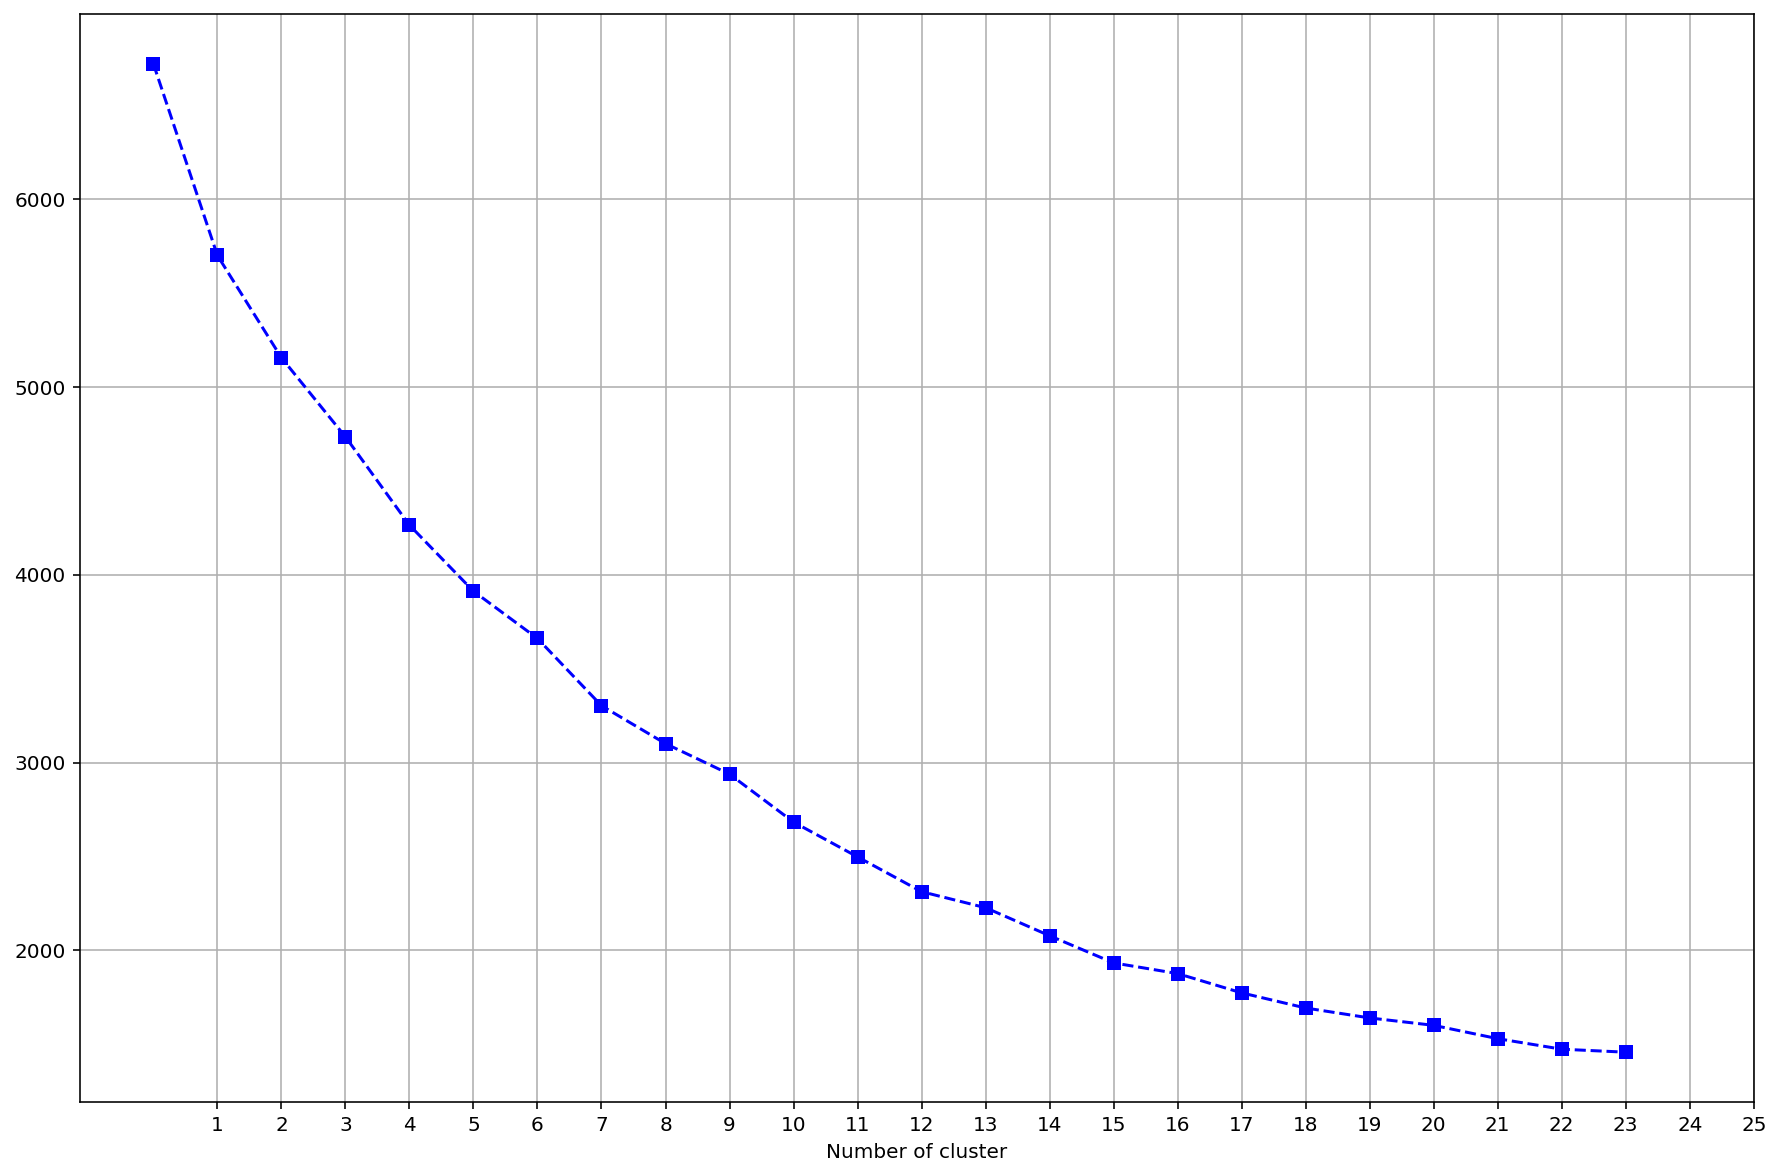

In [32]:
plt.plot(sse,'bs--')
plt.xticks(list(range(1,26)),list(range(1,26)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [33]:
sill = [] # sillhoute score
for i in range(2,26):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X_tfidf)
    y1 = model.predict(X_tfidf)
    score = silhouette_score(X_tfidf,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.1751
cluster: 3 	 Sillhoute: 0.1962
cluster: 4 	 Sillhoute: 0.2344
cluster: 5 	 Sillhoute: 0.2707
cluster: 6 	 Sillhoute: 0.2649
cluster: 7 	 Sillhoute: 0.3185
cluster: 8 	 Sillhoute: 0.3243
cluster: 9 	 Sillhoute: 0.3257
cluster: 10 	 Sillhoute: 0.3406
cluster: 11 	 Sillhoute: 0.3711
cluster: 12 	 Sillhoute: 0.3891
cluster: 13 	 Sillhoute: 0.4104
cluster: 14 	 Sillhoute: 0.4162
cluster: 15 	 Sillhoute: 0.4300
cluster: 16 	 Sillhoute: 0.4513
cluster: 17 	 Sillhoute: 0.4448
cluster: 18 	 Sillhoute: 0.4289
cluster: 19 	 Sillhoute: 0.4376
cluster: 20 	 Sillhoute: 0.4760
cluster: 21 	 Sillhoute: 0.4573
cluster: 22 	 Sillhoute: 0.4824
cluster: 23 	 Sillhoute: 0.4830
cluster: 24 	 Sillhoute: 0.4646
cluster: 25 	 Sillhoute: 0.4665


# **k_means**

In [34]:
#Implementation of Kmeans
model = KMeans(n_clusters=31, init='k-means++', max_iter=1000, n_init=1)
model.fit(X_tfidf)

KMeans(max_iter=1000, n_clusters=31, n_init=1)

In [35]:
#Predicting from the model
y_pred = model.predict(X_tfidf)
#Cluster Centers
centres = model.cluster_centers_
centres

array([[ 1.78498704e-02,  1.78498704e-02,  1.60446188e-03, ...,
         4.63922750e-03, -4.71844785e-16,  0.00000000e+00],
       [ 4.53975327e-02,  4.53975327e-02, -3.46944695e-17, ...,
         2.82639350e-02,  7.46993874e-01,  0.00000000e+00],
       [ 6.93889390e-17,  6.93889390e-17, -4.33680869e-17, ...,
        -6.24500451e-17, -6.66133815e-16, -3.46944695e-18],
       ...,
       [ 4.16333634e-17,  4.16333634e-17, -1.73472348e-18, ...,
         6.03630622e-03,  8.32667268e-17,  0.00000000e+00],
       [ 8.88414951e-02,  8.88414951e-02,  4.17824159e-03, ...,
         3.08194144e-02,  8.32667268e-17, -3.46944695e-18],
       [ 6.93889390e-17,  6.93889390e-17, -2.25514052e-17, ...,
         7.51910655e-01, -3.05311332e-16, -3.46944695e-18]])

In [36]:
#creating a column where each row is assigned to their separate cluster
df_clean_frame['cluster'] = model.labels_

In [37]:
df_clean_frame.head(5)

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",14
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,17


In [38]:
#Printing all the cluster centroids and their top 10 terms
clusters = df_clean_frame.groupby('cluster')    

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms= dada#.get_feature_name()

for i in range(31):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
   (0, 6)	1.0
   (0, 31)	0.7521473485422927
  (0, 6)	0.5446158077223455
  (0, 25)	0.3710363702654173
   (0, 31)	0.6182159210598415
  (0, 25)	0.6099352522744084
  (0, 12)	0.36232906066254633
  (0, 20)	0.33838693056984703
   (0, 42)	0.8763794460920065
  (0, 12)	0.4816212894665972
   (0, 34)	0.6307596696775373
  (0, 2)	0.5884369157558854
  (0, 35)	0.3463941317375829
  (0, 43)	0.29504013662159645
  (0, 20)	0.22101280181034968
   (0, 18)	0.7298037218150939
  (0, 25)	0.5978172995201305
  (0, 20)	0.33166399264812535
   (0, 42)	0.40310540620998925
  (0, 19)	0.37837315993094395
  (0, 25)	0.18645871483967696
  (0, 15)	0.4688897990603221
  (0, 17)	0.4688897990603221
  (0, 32)	0.4688897990603221
   (0, 6)	0.4980981056824174
  (0, 19)	0.6886186259501658
  (0, 25)	0.3393447464211413
  (0, 12)	0.4031721818112759
   (0, 12)	1.0
   (0, 6)	0.7008987753741075
  (0, 25)	0.47750897761467004
  (0, 20)	0.5298359019323522
------------
Cluster 1:
   (0, 25)	0.5239457506289741
  

In [39]:
#Printing all the cluster centroids and their top 10 terms
clusters = df_clean_frame.groupby('cluster')    

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms=tfid_vectorizer.get_feature_names_out()
#terms= dada.get_feature_name()

for i in range(31):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 music
 musicals
 movies
 documentaries
 international
 comedies
 dramas
 family
 children
 romantic
------------
Cluster 1:
 tv
 dramas
 shows
 international
 mysteries
 teen
 horror
 action
 adventure
 comedies
------------
Cluster 2:
 dramas
 international
 movies
 cult
 comedies
 romantic
 documentaries
 action
 family
 adventure
------------
Cluster 3:
 sci
 fi
 fantasy
 adventure
 action
 tv
 movies
 thrillers
 dramas
 horror
------------
Cluster 4:
 comedies
 international
 movies
 cult
 romantic
 dramas
 action
 adventure
 children
 family
------------
Cluster 5:
 action
 adventure
 movies
 international
 dramas
 comedies
 features
 independent
 anime
 romantic
------------
Cluster 6:
 thrillers
 dramas
 comedies
 shows
 movies
 romantic
 tv
 action
 adventure
 kids
------------
Cluster 7:
 documentaries
 international
 movies
 comedies
 dramas
 romantic
 children
 family
 action
 adventure
------------
Cluster 8:
 family
 children
 movies
 comed

### **visuaize**

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=31)
kmeans.fit(X_tfidf)
y_kmeans= kmeans.predict(X_tfidf)

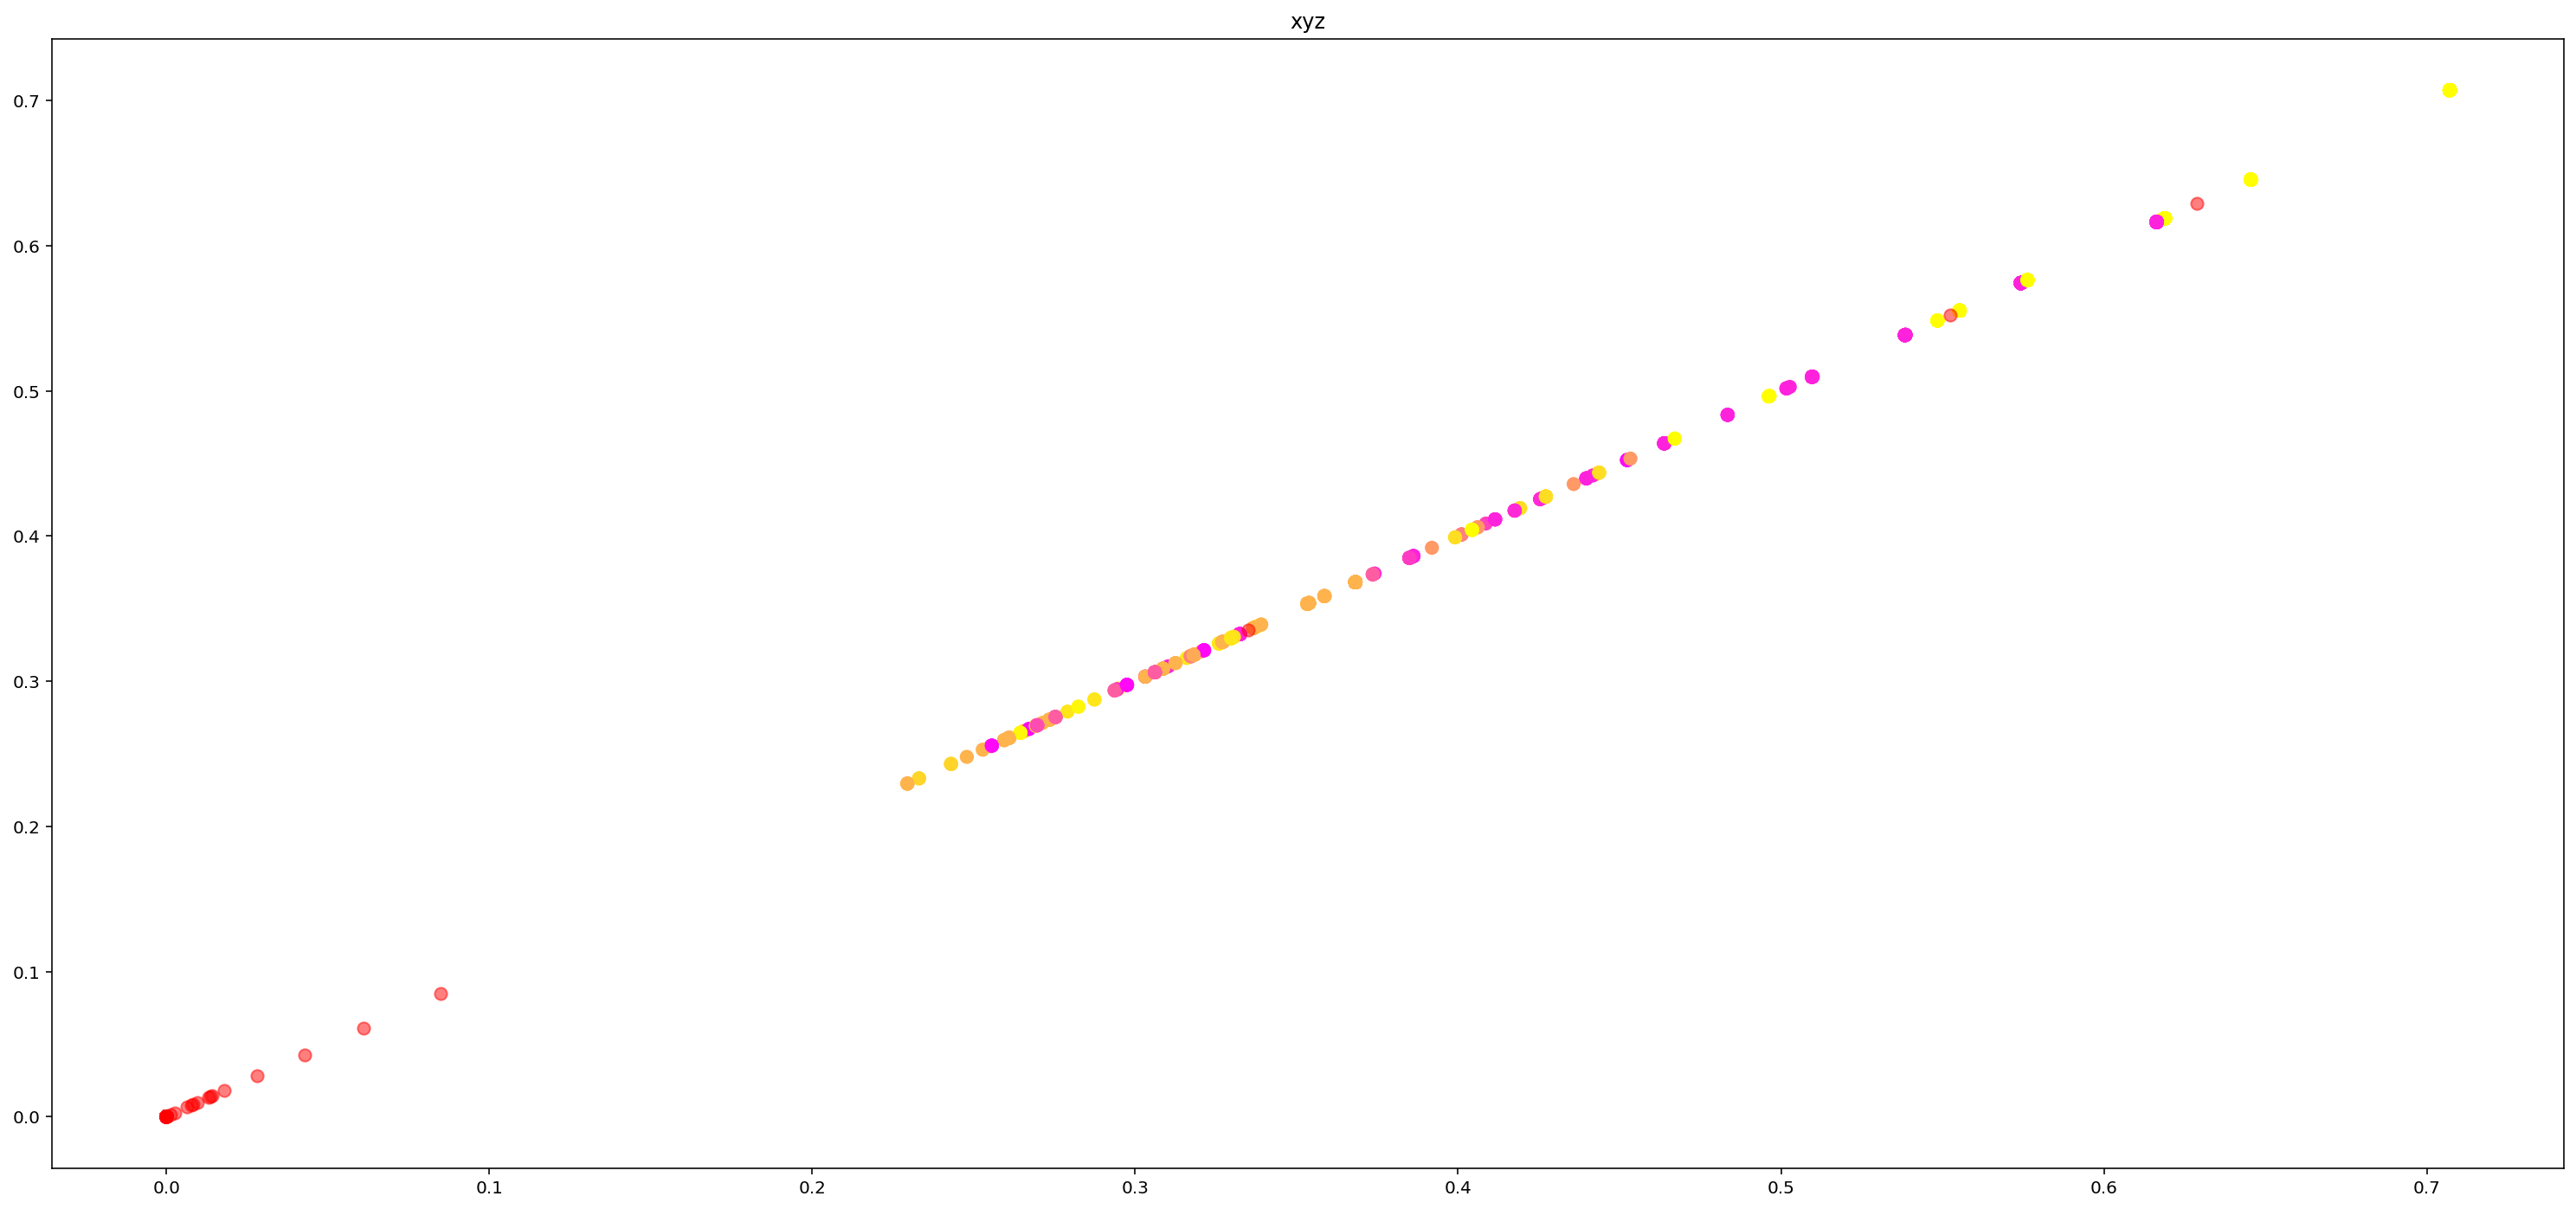

In [41]:
plt.figure(figsize=(26,12))
plt.title('xyz')
plt.scatter(X_tfidf[:, 0], X_tfidf[:, 1], c=y_kmeans, s=51, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=51, alpha=0.5)